In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
api_key="wa-FxFLJyWvFsyxj6zpA"

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()

In [3]:
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='quandl', start='1995-1-1', api_key=api_key)['AdjClose']

In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2018-03-27,77.79,89.47,10.83,13.44
2018-03-26,76.41,93.78,10.83,12.89
2018-03-23,75.91,87.18,10.56,13.07
2018-03-22,76.41,89.79,10.75,13.35
2018-03-21,77.04,92.48,11.10,13.88


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5849 entries, 2018-03-27 to 1995-01-03
Data columns (total 4 columns):
PG      5849 non-null float64
MSFT    5849 non-null float64
F       5849 non-null float64
GE      5849 non-null float64
dtypes: float64(4)
memory usage: 228.5 KB


In [6]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
1995-01-09,8.808129,2.506743,4.948832,4.442732
1995-01-06,8.861660,2.522554,4.863123,4.486824
1995-01-05,8.825490,2.480948,4.863123,4.508870
1995-01-04,8.952809,2.522554,4.905978,4.497406
1995-01-03,9.025149,2.504247,4.777414,4.497406


### Normalization to 100

In [7]:
mydata.iloc[0]

PG      77.79
MSFT    89.47
F       10.83
GE      13.44
Name: 2018-03-27 00:00:00, dtype: float64

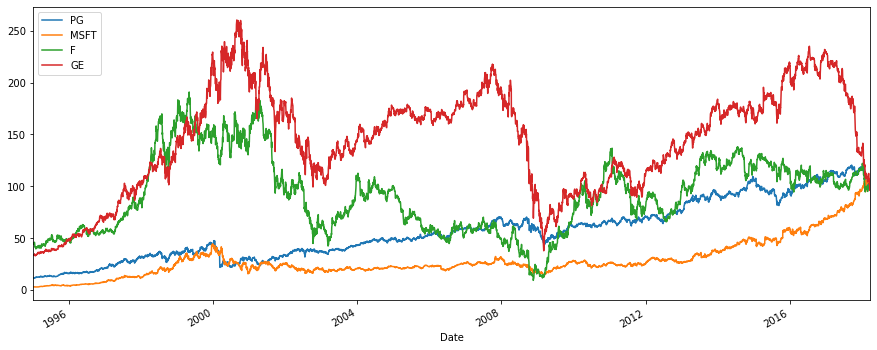

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

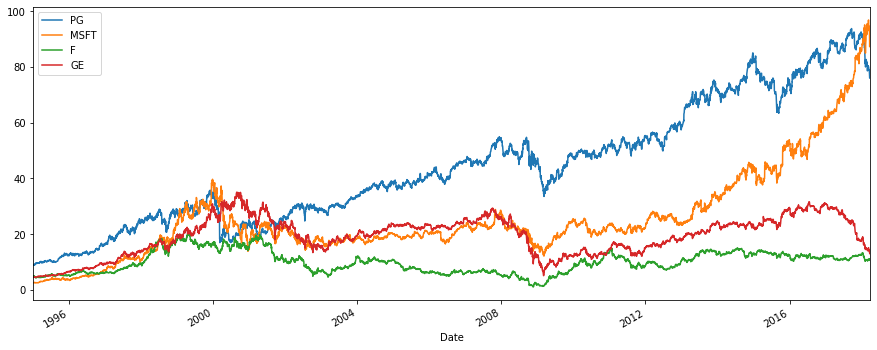

In [9]:
mydata.plot(figsize=(15, 6))

### Calculating the Return of a Portfolio of Securities

In [10]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
2018-03-27,NaN,NaN,NaN,NaN
2018-03-26,-0.017740,0.048173,0.000000,-0.040923
2018-03-23,-0.006544,-0.070377,-0.024931,0.013964
2018-03-22,0.006587,0.029938,0.017992,0.021423
2018-03-21,0.008245,0.029959,0.032558,0.039700


In [11]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [12]:
np.dot(returns, weights)

array([        nan, -0.00262253, -0.02197189, ..., -0.0039154 ,
        0.00936647, -0.00634561])

In [13]:
annual_returns = returns.mean() * 250
annual_returns

PG     -0.065951
MSFT   -0.103138
F       0.045282
GE     -0.004322
dtype: float64

In [14]:
np.dot(annual_returns, weights)

-0.032032062913105196